In [ ]:
pip install pyLDAvis==3.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.7 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

preprocessed_documents = [preprocess(doc) for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary([doc.split() for doc in preprocessed_documents])
# Convert the document into a bag-of-words format
corpus = [dictionary.doc2bow(doc.split()) for doc in preprocessed_documents]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.008*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.007*"space" + 0.005*"u" + 0.004*"day"')
(1, '0.030*"god" + 0.012*"christian" + 0.009*"jesus" + 0.008*"church"')
(2, '0.012*"line" + 0.011*"writes" + 0.011*"subject" + 0.011*"organization"')
(3, '0.071*"x" + 0.029*"image" + 0.025*"file" + 0.008*"jpeg"')
(4, '0.011*"line" + 0.010*"game" + 0.010*"subject" + 0.010*"organization"')
(5, '0.011*"people" + 0.011*"would" + 0.010*"one" + 0.008*"dont"')
(6, '0.014*"bank" + 0.010*"gordon" + 0.010*"la" + 0.009*"pt"')
(7, '0.013*"line" + 0.012*"subject" + 0.011*"organization" + 0.006*"window"')
(8, '0.024*"key" + 0.012*"chip" + 0.010*"encryption" + 0.009*"clipper"')
(9, '0.014*"armenian" + 0.012*"israel" + 0.010*"jew" + 0.009*"israeli"')


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora

# Assuming preprocessed_documents is a list of tokenized documents
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary([doc.split() for doc in preprocessed_documents]) # Use preprocessed_documents instead of texts

# Convert the documents into Bag-of-Words format
bow_corpus = [dictionary.doc2bow(doc.split()) for doc in preprocessed_documents]

# Assuming lda_model is already defined and trained
# Get the number of topics
num_topics = lda_model.num_topics

# Apply the LDA model to the Bag-of-Words corpus to get topic distributions
lda_corpus = [lda_model[doc] for doc in bow_corpus]

# Initialize a list to hold topic distributions for each document
topic_vectors = []

# For each document, create a vector of size num_topics
for doc in lda_corpus:
    doc_vector = np.zeros(num_topics)
    for topic_num, topic_val in doc:
        doc_vector[topic_num] = topic_val
    topic_vectors.append(doc_vector)

# Convert the list to a NumPy array
topic_vectors = np.array(topic_vectors)

# Calculate cosine similarity between the topic vectors
similarity_matrix = cosine_similarity(topic_vectors)

# Example: Print similarity between document 0 and others
print(similarity_matrix[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1.         0.21485015 0.07177717 ... 0.0442994  0.         0.        ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


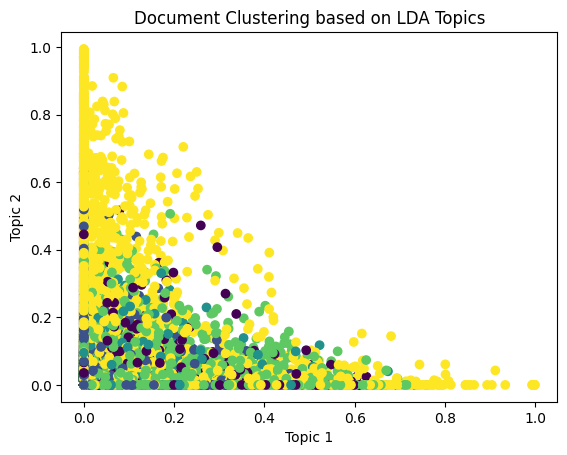

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(similarity_matrix)

# Visualize the clusters
plt.scatter(topic_vectors[:, 0], topic_vectors[:, 1], c=km.labels_, cmap='viridis')
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title('Document Clustering based on LDA Topics')
plt.show()